In [9]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# importing the dataset
data = pd.read_csv('Flight_Booking.csv')

In [11]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [12]:
# removing unwanted columns
data.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### EDA

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


No Null values present in the dataset

In [15]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [16]:
# checking for duplicate values
data.duplicated().sum()

0

No duplicate records present.

In [17]:
# no.of unique flights by each airline
flights = data.groupby('airline')['flight'].nunique().sort_values(ascending=False)
flights

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: flight, dtype: int64

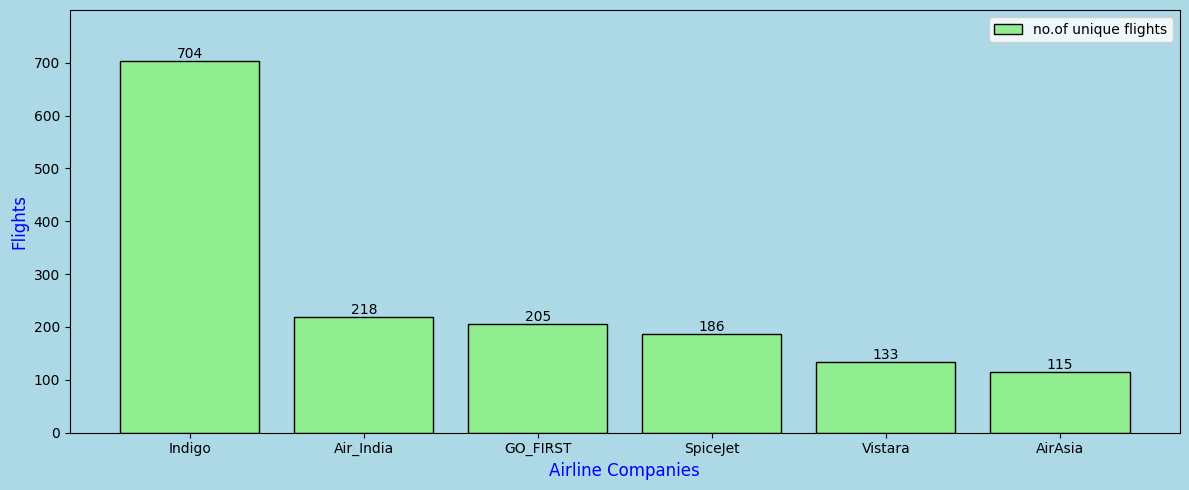

In [18]:
# plot the different airline companies and their flights
figure = plt.figure(figsize=(12,5), facecolor='lightblue')
sp = plt.subplot()
plot = sp.bar(flights.index, flights.values, color = 'lightgreen', edgecolor = 'k', label = 'no.of unique flights')
plt.xlabel('Airline Companies', color = 'b', fontsize = 12)
plt.ylabel('Flights', color = 'b', fontsize = 12)
plt.ylim((0,800))
plt.yticks(range(0,800,100))
plt.tight_layout()
plt.legend()
plt.bar_label(plot)
#plt.grid()
sp.set_facecolor('lightblue')
plt.show()

There's a variation between the count of unique flight services among different airline companies.  

**Indigo** provides the highest flight services whereas **AirAsia** provides least flight services

In [19]:
# retrieving the cities with their count for no.of outgoing flights
source = data.groupby('source_city')['flight'].nunique().sort_values(ascending=False)
source

source_city
Delhi        472
Mumbai       323
Bangalore    264
Kolkata      206
Hyderabad    191
Chennai      156
Name: flight, dtype: int64

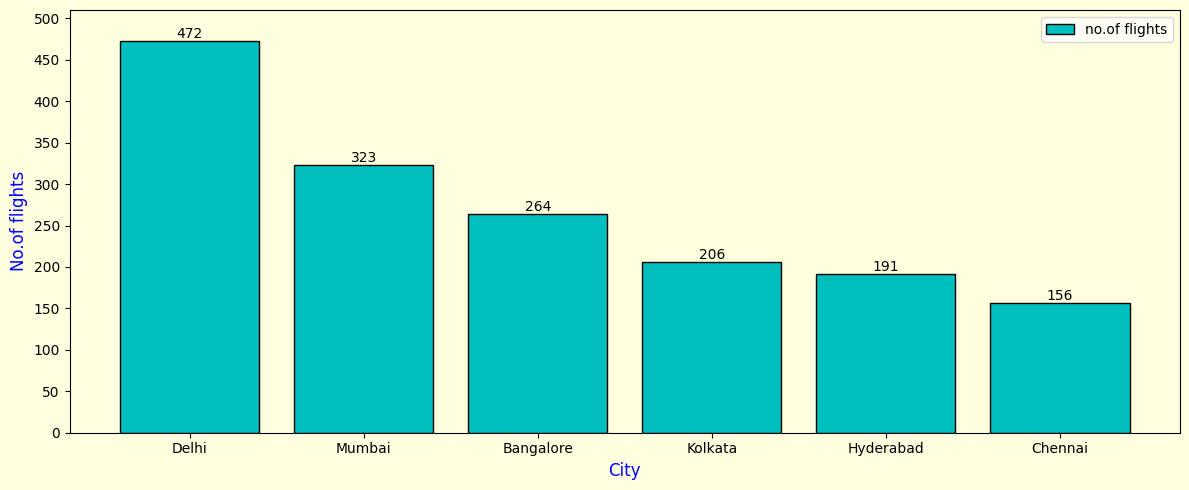

In [20]:
# plot the results
figure = plt.figure(figsize = (12,5), facecolor='lightyellow')
sp = plt.subplot()
sp.set_facecolor('lightyellow')
barplot = plt.bar(source.index, source.values, color = 'c', edgecolor = 'k', label = 'no.of flights')
plt.ylim(0,510)
plt.yticks(range(0,550,50))
plt.xlabel('City', color = 'b', fontsize = 12)
plt.ylabel('No.of flights', color = 'b', fontsize = 12)
plt.bar_label(barplot)
plt.legend()
plt.tight_layout()
#plt.grid(color = 'gray')
plt.show()

**Delhi** has the highest no.of outgoing flights whereas **Chennai** has the least no.of outgoing flights.

In [21]:
# retrieving the cities with their count for no.of incoming flights
destination = data.groupby('destination_city')['flight'].nunique().sort_values(ascending=False)
destination

destination_city
Kolkata      772
Delhi        714
Bangalore    654
Mumbai       646
Hyderabad    562
Chennai      536
Name: flight, dtype: int64

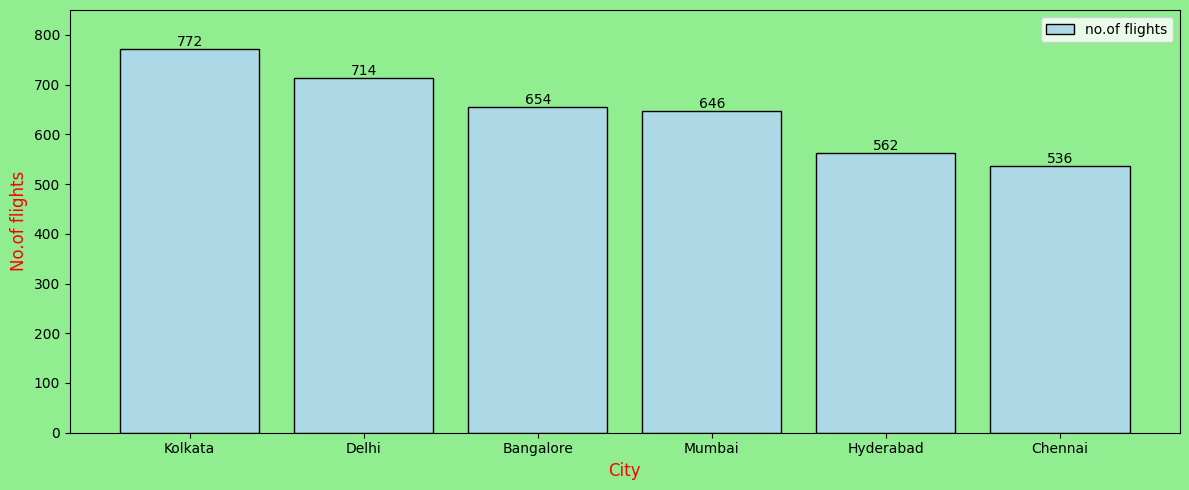

In [22]:
# plotting the results
figure = plt.figure(figsize=(12,5), facecolor='lightgreen')
sp = plt.subplot()
sp.set_facecolor('lightgreen')
barplot = plt.bar(destination.index, destination.values, color = 'lightblue', edgecolor = 'k', label = 'no.of flights')
plt.ylim(0,850)
plt.yticks(range(0,850,100))
plt.xlabel('City', color = 'red', fontsize = 12)
plt.ylabel('No.of flights', color = 'red', fontsize = 12)
plt.bar_label(barplot)
plt.tight_layout()
plt.legend()
#plt.grid(color = 'gray')
plt.show()

**Kolkota** has the highest number of incoming flights, **Chennai** has the least number of incoming flights

Among the cities, **Chennai** has the least **outgoing** and **incoming** flights.

In [23]:
# retrieving flights departure time
departure = data.groupby('departure_time')['flight'].nunique().sort_values(ascending=False)
departure

departure_time
Early_Morning    391
Evening          370
Morning          356
Afternoon        321
Night            223
Late_Night        23
Name: flight, dtype: int64

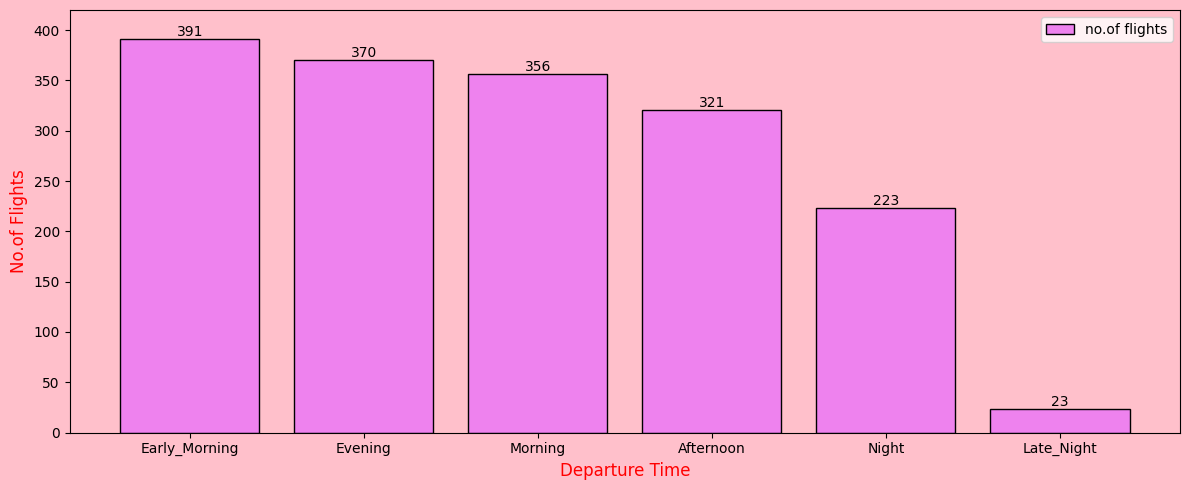

In [24]:
# plotting the results
figure = plt.figure(figsize= (12,5), facecolor='pink')
sp = plt.subplot()
sp.set_facecolor('pink')
barplot = plt.bar(departure.index, departure.values, color = 'violet', edgecolor = 'k', label = 'no.of flights')
plt.ylim(0,420)
plt.xlabel('Departure Time', color = 'r', fontsize = 12)
plt.ylabel('No.of Flights', color = 'r', fontsize = 12)
plt.tight_layout()
plt.bar_label(barplot)
plt.legend()
#plt.grid(color = 'gray')
plt.show()

From **Early Morning** till **Evening** approximately same no.of flights, in **Night** and **Late Night** we have few flights.

In [25]:
# retrieving the flights arrival time
arrival = data.groupby('arrival_time')['flight'].nunique().sort_values(ascending=False)
arrival

arrival_time
Night            957
Evening          820
Morning          674
Afternoon        671
Late_Night       383
Early_Morning    368
Name: flight, dtype: int64

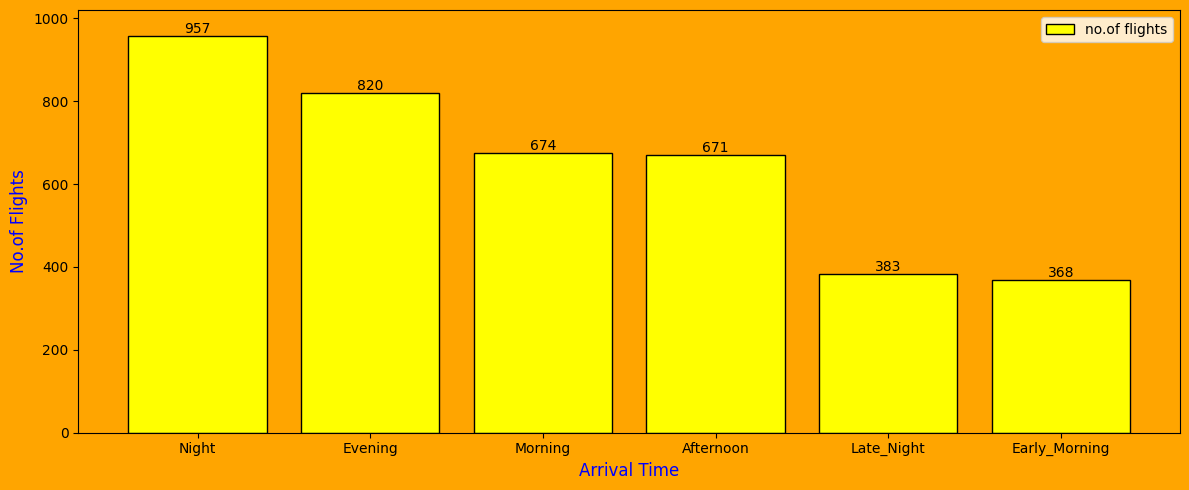

In [26]:
# plotting the results
figure = plt.figure(figsize=(12,5), facecolor=('orange'))
sp = plt.subplot()
sp.set_facecolor('orange')
barplot = plt.bar(arrival.index, arrival.values, color = 'yellow', edgecolor = 'k', label = 'no.of flights')
plt.ylim(0,1020)
plt.xlabel('Arrival Time', color = 'b', fontsize = 12)
plt.ylabel('No.of Flights', color = 'b', fontsize = 12)
plt.tight_layout()
plt.bar_label(barplot)
plt.legend()
#plt.grid(color = 'gray')
plt.show()

From **Morning** till **Night** we have considerable amount of flight options.

In [27]:
# retrieving flight class and their counts
flight_class = data.groupby('class')['flight'].nunique().sort_values(ascending=False)
flight_class

class
Economy     1560
Business     295
Name: flight, dtype: int64

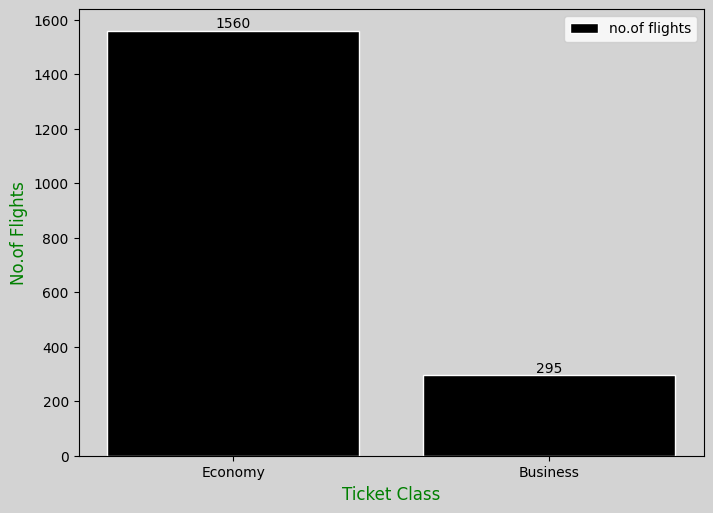

In [28]:
figure = plt.figure(figsize=(7,5), facecolor='lightgrey')
sp = plt.subplot()
sp.set_facecolor('lightgrey')
barplot = plt.bar(flight_class.index, flight_class.values, color = 'k', edgecolor = 'white', label = 'no.of flights')
plt.tight_layout()
plt.xlabel('Ticket Class', color = 'g', fontsize = 12)
plt.ylabel('No.of Flights', color = 'g', fontsize = 12)
plt.bar_label(barplot)
plt.legend()
# plt.grid(color = 'white')
plt.show()

Majority of Flights belongs to **Economy** class

C:\Users\nooru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nooru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nooru\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

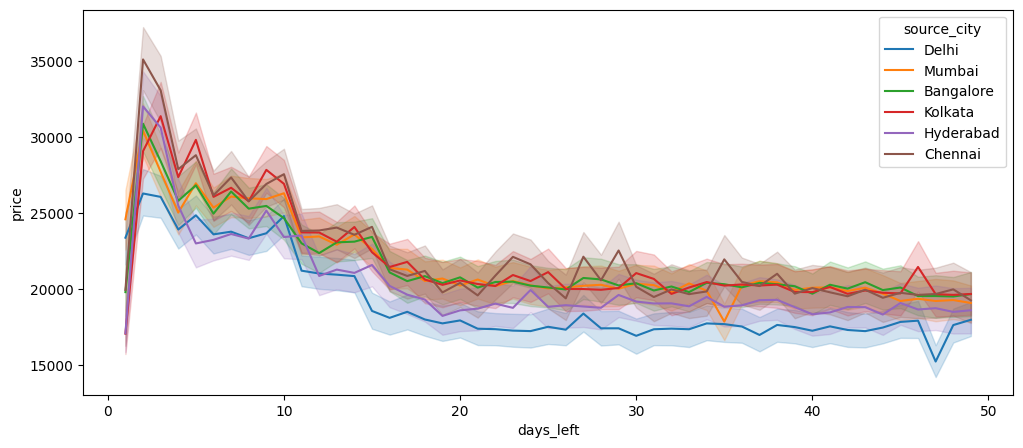

In [29]:
# relationship between price and days left for flight
figure = plt.figure(figsize=(12,5))
plot = sns.lineplot(data = data, x = 'days_left', y = 'price', hue = 'source_city')
plt.show()

Airline Companies are charging heavily for immediate flight bookings

In [30]:
# retrieving flights and their stops
stops = data.groupby('stops')['flight'].nunique().sort_values(ascending=False)
stops

stops
one            1343
zero            818
two_or_more     283
Name: flight, dtype: int64

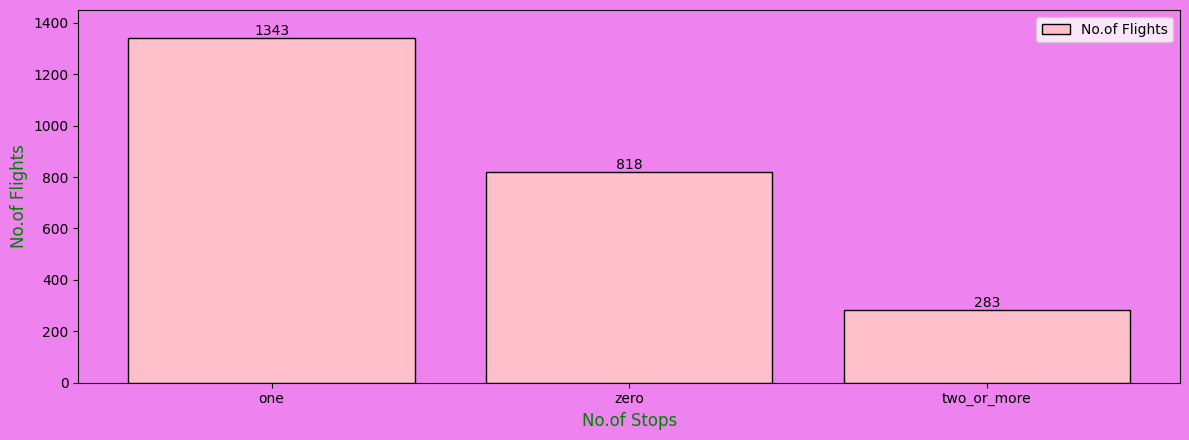

In [31]:
#plotting the results
figure = plt.figure(figsize=(12,4.5), facecolor='violet')
sp = plt.subplot()
sp.set_facecolor('violet')
barplot = plt.bar(stops.index, stops.values, color = 'pink', edgecolor = 'k', label = 'No.of Flights')
plt.ylim(0,1450)
plt.xlabel('No.of Stops', color = 'g', fontsize = 12)
plt.ylabel('No.of Flights', color = 'g', fontsize = 12)
plt.tight_layout()
plt.bar_label(barplot)
plt.legend()
plt.show()

Most of Flights have **0 or 1** stops

In [32]:
# creating a copy of the data
df = data.copy()
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [33]:
objects_len = len(df.select_dtypes('object').columns)
print(f'No. of columns with dtype: Object is {objects_len}')

No. of columns with dtype: Object is 8


In [34]:
objects_cols = df.select_dtypes('object').columns
print(f'Names of the columns with dtype: Object is: {objects_cols.values}')

Names of the columns with dtype: Object is: ['airline' 'flight' 'source_city' 'departure_time' 'stops' 'arrival_time'
 'destination_city' 'class']


In [35]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating label encoder object
le = LabelEncoder()

In [36]:
# label encoding all object-type columns using a for-loop
for cols in objects_cols:
    df[cols] = le.fit_transform(df[cols].values)

In [37]:
# looking at dataset after label encoding
df.head(15)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
5,5,1541,2,4,2,0,5,1,2.33,1,5955
6,5,1533,2,4,2,4,5,1,2.08,1,6060
7,5,1543,2,0,2,2,5,1,2.17,1,6060
8,2,1013,2,1,2,4,5,1,2.17,1,5954
9,2,1014,2,0,2,2,5,1,2.25,1,5954


In [38]:
# splitting the dataset into X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [39]:
# feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [41]:
# VIF Value should be less than 5, else drop that column
vif_data[vif_data['VIF']>5]

,features,VIF
0,airline,6.701818
1,flight,12.675046


Column **`flight`** showcases high **VIF**, hence it is dropped

In [42]:
X.drop('flight', axis=1, inplace=True)

In [43]:
# calculating VIF after removing flight column
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [44]:
vif_data[vif_data['VIF']>5]

,features,VIF


In [45]:
vif_data

,features,VIF
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


Now, all columns have **VIF** under 5

In [46]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.2, random_state=42)

### Model

#### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [48]:
# scale down the values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [49]:
# train the model
lr.fit(xtrain,ytrain)

LinearRegression()

In [50]:
ypred = lr.predict(xtest)

In [51]:
# evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
rmse = mean_squared_error(ytest,ypred, squared=False)
mae = mean_absolute_error(ytest, ypred)
print(f'mae: {mae}, rmse: {rmse}')

mae: 4624.994868017024, rmse: 7014.309680483318


#### Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [54]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [55]:
ypred = dtr.predict(xtest)

In [56]:
rmse = mean_squared_error(ytest,ypred, squared=False)
mae = mean_absolute_error(ytest, ypred)
print(f'mae: {mae}, rmse: {rmse}')

mae: 1171.194671641874, rmse: 3537.945977866096


Decision Tree is performing better than Linear Regression.

#### Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [58]:
rfr.fit(xtrain,ytrain)

RandomForestRegressor()

In [59]:
ypred = rfr.predict(xtest)

In [60]:
rmse = mean_squared_error(ytest,ypred, squared=False)
mae = mean_absolute_error(ytest, ypred)
print(f'mae: {mae}, rmse: {rmse}')

mae: 1091.032065814673, rmse: 2789.765575232272


**Random Forest Regressor** is performing well when compared to **Decision Tree Regressor** and **Linear Regression models**.